ASSIGNMENT-1, QUES-2

In [40]:
pip install yfinance

importing necessary libraries

In [41]:
import yfinance as yf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools 
import math

taking three stocks from the user:(example- AAPL) 

In [47]:
#takes input from user for stock tickers

stock1=input("Enter first stock ticker: ")
stock2=input("Enter second stock ticker: ")
stock3=input("Enter third stock ticker: ")

Enter first stock ticker:  QCOM
Enter second stock ticker:  AAPL
Enter third stock ticker:  GOOGL


extracting closing prices from yfinance

In [48]:
data1=yf.download(tickers=stock1,start="2024-01-01",end="2024-06-01",interval="1d")
closing1=data1["Close"]
data2=yf.download(tickers=stock2,start="2024-01-01",end="2024-06-01",interval="1d")
closing2=data2["Close"]
data3=yf.download(tickers=stock3,start="2024-01-01",end="2024-06-01",interval="1d")
closing3=data3["Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Calculating Daily returns

In [49]:
#Calculating daily returns using a function and storing them in a list
def daily_return(closing):
    closing_copy=closing.copy()
    closing_copy.index=range(0,len(closing))
    daily_return_list=[]

    i=1
    while i<len(closing_copy):
        daily_return_value=(closing_copy.loc[i]-closing_copy.loc[i-1])/closing_copy.loc[i-1]
        daily_return_list.append(float(daily_return_value.iloc[0]))
        i+=1


    return daily_return_list


return_list1=daily_return(closing1)
return_list2=daily_return(closing2)
return_list3=daily_return(closing3)

#this was asked to do as a task in the assignment,however not asked to submit therefore i have only stored the values and not printed them.




Calculating portfolio value after each day

In [50]:
# equally $3333.33 are invested into each stock, however the complete amount is not invested as shares cannot be bought in fraction hence we use .floor() 
investment=3333.33
no_of_stock1=math.floor(investment/closing1.loc["2024-01-02"])
no_of_stock2=math.floor(investment/closing2.loc["2024-01-02"])
no_of_stock3=math.floor(investment/closing3.loc["2024-01-02"])

# the shares1 parameter in the below function refers to the no of stocks of the first stock 
# closing1 is the previously extracted closing prices data from the financial data

def portfolio_value_list(shares1,shares2,shares3,closing1,closing2,closing3):
    portfolio_value_list=[]
    closing_list1=closing1.squeeze().tolist()
    closing_list2=closing2.squeeze().tolist()
    closing_list3=closing3.squeeze().tolist()
    for (a,b,c) in zip(closing_list1,closing_list2,closing_list3):
        portfolio_value=a*shares1+b*shares2+c*shares3
        portfolio_value_list.append(portfolio_value)

    return portfolio_value_list


    


C:\Users\HP\AppData\Local\Temp\ipykernel_13024\3799672020.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  no_of_stock1=math.floor(investment/closing1.loc["2024-01-02"])
C:\Users\HP\AppData\Local\Temp\ipykernel_13024\3799672020.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  no_of_stock2=math.floor(investment/closing2.loc["2024-01-02"])
C:\Users\HP\AppData\Local\Temp\ipykernel_13024\3799672020.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  no_of_stock3=math.floor(investment/closing3.loc["2024-01-02"])


Now calculating the portfolio return(daily returns of the portfolio)

In [51]:
#calculating actual weights
#shares represent the parameter for no. of stocks bought
def weight_calculate(shares,closing):
    total_money_invested=portfolio_value_list(no_of_stock1,no_of_stock2,no_of_stock3,closing1,closing2,closing3)[0]
    weight=float(closing.iloc[0])*shares/total_money_invested
    return weight
    
#storing weights in a list by using the weight function defined above
weight1=weight_calculate(no_of_stock1,closing1)
weight2=weight_calculate(no_of_stock2,closing2)
weight3=weight_calculate(no_of_stock3,closing3)
weights=[weight1,weight2,weight3]

def portfolio_return(list1,list2,list3,weights):
    portfolio_return_list=[]
    for (a,b,c) in zip(list1,list2,list3):
        
        portfolio_value=weights[0]*a+weights[1]*b+weights[2]*c
        portfolio_return_list.append(portfolio_value)
    return portfolio_return_list

#stored the daily returns of the portfolio in a list

portfolio_daily_returns_list=portfolio_return(return_list1,return_list2,return_list3,weights)

#this was asked to do as a task in the assignment,however not asked to submit therefore i have only stored the values and not printed them.

C:\Users\HP\AppData\Local\Temp\ipykernel_13024\1441519096.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight=float(closing.iloc[0])*shares/total_money_invested


Now plotting the portfolio daily returns vs time(date)

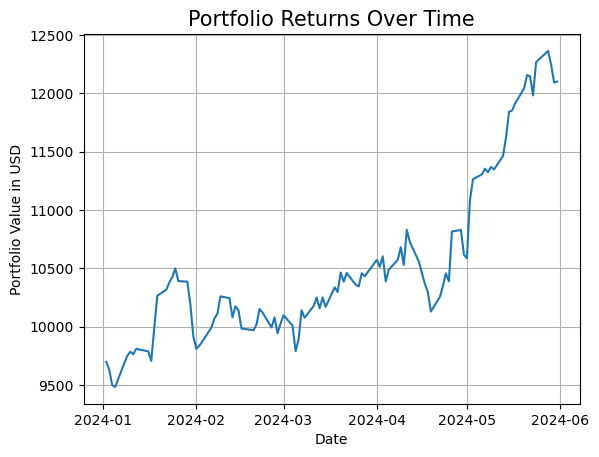

In [52]:
#getting the date column from closing dataframe
date=closing1.index
#plotting the graph
plt.plot(date,portfolio_value_list(no_of_stock1,no_of_stock2,no_of_stock3,closing1,closing2,closing3))
plt.grid()
plt.xlabel("Date")
plt.ylabel("Portfolio Value in USD")
plt.title("Portfolio Returns Over Time",size=15)
plt.show()


Calculating the portfolio's final value at the end of six months

In [53]:
print("The portfolio initial investment is")
print(portfolio_value_list(no_of_stock1,no_of_stock2,no_of_stock3,closing1,closing2,closing3)[0])
print("The final portfolio value is:")
print(portfolio_value_list(no_of_stock1,no_of_stock2,no_of_stock3,closing1,closing2,closing3)[-1])

The portfolio initial investment is
9697.24984741211
The final portfolio value is:
12101.40007019043
